In [1]:
# =======
# imports
# =======
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

# Estimating residential electricity demand

The data that we work with are: 
- percentage of population for which WTP > LCOE of at least one available off-grid option
- percentage of population for which WTP > cost of grid expansion in the area where they live
- total population

These three data series are available for each year between 2010 and 2050, from the GIS analysis. 

## Import and prepare input data

In [2]:
acc_dir = "C:\\Users\\dallalongaf\\OneDrive - TNO\\work\\2016 02 - TransRisk\\4 - energy access\\AFR_alt\\"

off_dir = acc_dir+"gis_layers\\off-grid_access\\output\\"
offgrid = pd.read_excel(off_dir+"off-grid_access.xlsx")

on_dir = acc_dir+"gis_layers\\on-grid_access\\output\\"
ongrid = pd.read_excel(on_dir+"on-grid_access.xlsx")

data_dir = acc_dir+"code\\input_data\\"
pop_data = pd.read_excel(data_dir+"Population-EstimatesEXCEL.xlsx",sheet_name='Data')

In [3]:
# get rid of Guinea-Bissau and Western Sahara from on and offgrid DFs:
#offgrid = pd.read_excel(off_dir+"off-grid_access.xlsx")
#ongrid = pd.read_excel(on_dir+"on-grid_access.xlsx")
to_remove = ['Cape Verde','Comoros','Sao Tome and Principe','Guinea-Bissau','Western Sahara']
offgrid = offgrid.drop(offgrid[offgrid.COUNTRY.isin(to_remove)].index, axis=0)\
                 .reset_index().drop('index',axis=1)
offgrid.loc[:,'2010'] = 0
ongrid = ongrid.drop(ongrid[ongrid.COUNTRY.isin(to_remove)].index, axis=0)\
               .reset_index().drop('index',axis=1)

In [4]:
offgrid

,COUNTRY,2010,2020,2030,2040,2050
0,Algeria,0,0.995554,0.998158,1.000000e+00,1.000000e+00
1,Angola,0,0.920855,0.999920,9.999198e-01,9.999293e-01
2,Benin,0,0.160925,0.998676,9.999985e-01,1.000000e+00
3,Botswana,0,0.000000,0.000000,9.980772e-01,9.999776e-01
4,Burkina Faso,0,0.000023,0.000023,2.262395e-05,5.214355e-05
5,Burundi,0,0.000000,0.000000,2.949453e-04,2.949453e-04
6,Cameroon,0,0.000008,0.810100,9.998382e-01,9.998382e-01
7,Central African Republic,0,0.000000,0.000011,1.141331e-05,1.141331e-05
8,Chad,0,0.000224,0.003405,3.404915e-03,3.404915e-03
9,Congo,0,0.119454,0.999716,9.997155e-01,9.997155e-01


In [5]:
# toal poulation in DF pop:
pop = pop_data[pop_data['Indicator Name']=='Population, total']
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
166,Arab World,ARB,"Population, total",SP.POP.TOTL,9.249093e+07,9.504450e+07,9.768229e+07,1.004111e+08,1.032399e+08,1.061750e+08,...,6.074190e+08,6.152530e+08,6.230380e+08,6.307820e+08,6.384650e+08,6.460880e+08,6.536420e+08,6.611270e+08,6.685250e+08,6.758460e+08
341,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,4.198307e+06,4.277802e+06,4.357746e+06,4.436804e+06,4.513246e+06,4.585777e+06,...,7.628000e+06,7.618000e+06,7.607000e+06,7.590000e+06,7.578000e+06,7.562000e+06,7.543000e+06,7.525000e+06,7.505000e+06,7.482000e+06
516,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,9.140158e+07,9.223712e+07,9.301489e+07,9.384575e+07,9.472260e+07,9.544706e+07,...,9.205100e+07,9.151700e+07,9.099100e+07,9.047700e+07,8.995900e+07,8.945300e+07,8.894700e+07,8.844000e+07,8.793000e+07,8.740300e+07
691,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,9.792269e+08,1.002453e+09,1.026507e+09,1.051326e+09,1.076932e+09,1.103305e+09,...,4.051404e+09,4.076936e+09,4.101645e+09,4.125522e+09,4.148552e+09,4.170717e+09,4.192016e+09,4.212437e+09,4.231978e+09,4.250619e+09
866,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.042017e+09,1.045308e+09,1.059467e+09,1.084916e+09,1.109997e+09,1.136132e+09,...,2.434665e+09,2.433725e+09,2.432287e+09,2.430332e+09,2.427853e+09,2.424828e+09,2.421272e+09,2.417205e+09,2.412649e+09,2.407261e+09


In [6]:
# Some countries have different names in pop.
# Country names in ongrid and offgrid are leading. 
# Put the names that change in a list called replacements:
replacements = []
for c in offgrid.COUNTRY:
    inout = c in list(pop['Country Name'])
    # if name is not found in pop...
    if not inout:
        print('---')
        print(c)
        replacements.append(c) # ...put it in replacements
        # then check if any parts of the name are present 
        # anywhere-else in pop and print an overview
        for x in c.split(' '):
            for name in pop[pop['Country Name'].str.contains(x)].loc[:,'Country Name'].values:
                print(c,"-->", name)


---
Congo
Congo --> Congo, Dem. Rep.
Congo --> Congo, Rep.
---
Democratic Republic of Congo
Democratic Republic of Congo --> Central African Republic
Democratic Republic of Congo --> Czech Republic
Democratic Republic of Congo --> Dominican Republic
Democratic Republic of Congo --> Kyrgyz Republic
Democratic Republic of Congo --> Slovak Republic
Democratic Republic of Congo --> Syrian Arab Republic
Democratic Republic of Congo --> Isle of Man
Democratic Republic of Congo --> Congo, Dem. Rep.
Democratic Republic of Congo --> Congo, Rep.
---
Egypt
Egypt --> Egypt, Arab Rep.
---
Gambia
Gambia --> Gambia, The
---
Guinea Bissau
Guinea Bissau --> Equatorial Guinea
Guinea Bissau --> Guinea
Guinea Bissau --> Guinea-Bissau
Guinea Bissau --> Papua New Guinea
Guinea Bissau --> Guinea-Bissau
---
Ivory Coast


In [7]:
# Ivory Coast is not picked up by our algorithm. 
# It is actually stored in pop with its French name:
pop[pop['Country Name'].str.contains('Ivo')].loc[:,'Country Name'].values

array(["Cote d'Ivoire"], dtype=object)

In [8]:
replacements

['Congo',
 'Democratic Republic of Congo',
 'Egypt',
 'Gambia',
 'Guinea Bissau',
 'Ivory Coast']

In [9]:
# In pop replace the wrong names with the right ones
to_replace = ['Congo, Rep.','Congo, Dem. Rep.',
              'Egypt, Arab Rep.','Gambia, The','Guinea-Bissau',
              "Cote d'Ivoire"]
pop = pop.replace(to_replace,replacements)
pop[pop['Country Name'].isin(replacements)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
15216,Democratic Republic of Congo,COD,"Population, total",SP.POP.TOTL,15248251.0,15637733.0,16041263.0,16461930.0,16903923.0,17369883.0,...,161023000.0,164964000.0,168936000.0,172935000.0,176961000.0,181010000.0,185080000.0,189170000.0,193278000.0,197404000.0
15391,Congo,COG,"Population, total",SP.POP.TOTL,1037220.0,1064111.0,1092292.0,1121735.0,1152412.0,1184316.0,...,9521000.0,9736000.0,9952000.0,10170000.0,10389000.0,10610000.0,10832000.0,11056000.0,11282000.0,11510000.0
15741,Ivory Coast,CIV,"Population, total",SP.POP.TOTL,3558988.0,3694205.0,3841071.0,3996941.0,4157965.0,4321791.0,...,42708000.0,43631000.0,44565000.0,45509000.0,46464000.0,47428000.0,48402000.0,49385000.0,50376000.0,51375000.0
17666,Egypt,EGY,"Population, total",SP.POP.TOTL,26996533.0,27744712.0,28506176.0,29281250.0,30071102.0,30875964.0,...,138806000.0,140530000.0,142235000.0,143918000.0,145576000.0,147206000.0,148807000.0,150379000.0,151921000.0,153433000.0
19766,Gambia,GMB,"Population, total",SP.POP.TOTL,367928.0,376737.0,383523.0,389072.0,394553.0,400861.0,...,3856000.0,3936000.0,4015000.0,4094000.0,4173000.0,4251000.0,4329000.0,4407000.0,4485000.0,4562000.0
21691,Guinea Bissau,GNB,"Population, total",SP.POP.TOTL,616409.0,623415.0,629969.0,636586.0,643961.0,652562.0,...,3088000.0,3144000.0,3201000.0,3258000.0,3316000.0,3373000.0,3431000.0,3488000.0,3545000.0,3603000.0


In [10]:
# Double-check that it worked
for c in offgrid.COUNTRY:
    inout = c in list(pop['Country Name'])
    if not inout:
        print(c)

In [11]:
#pop = original_pop

In [12]:
original_pop = pop
# Let's give pop the same structure as offgrid and ongrid
cols = ['Country Name','2010','2020','2030','2040','2050']
pop = pop[cols]
pop = pop.sort_values(by='Country Name')
pop.columns = offgrid.columns
# Let's only select relevant countries
pop = pop[pop.COUNTRY.isin(list(offgrid.COUNTRY))]
pop

,COUNTRY,2010,2020,2030,2040,2050
7866,Algeria,3.611764e+07,43333000.0,48822000.0,53249000.0,57437000.0
8391,Angola,2.336913e+07,32827000.0,44712000.0,59249000.0,76046000.0
11016,Benin,9.199259e+06,12123000.0,15628000.0,19614000.0,23930000.0
11891,Botswana,2.014866e+06,2416000.0,2800000.0,3138000.0,3421000.0
12766,Burkina Faso,1.560522e+07,20903000.0,27382000.0,34954000.0,43207000.0
12941,Burundi,8.766930e+06,11939000.0,15799000.0,20377000.0,25762000.0
13466,Cameroon,1.997050e+07,25958000.0,32980000.0,41021000.0,49817000.0
13991,Central African Republic,4.448525e+06,4921000.0,6124000.0,7481000.0,8851000.0
14166,Chad,1.188720e+07,16285000.0,21460000.0,27321000.0,33636000.0
15391,Congo,4.386693e+06,5687000.0,7319000.0,9309000.0,11510000.0


In [13]:
# There's no projection for Eritrea. We estimate it using 
# the average growth rate per decade of its neighbors 
pop = pop.set_index('COUNTRY')
neighbors = ['Sudan','Djibouti','Ethiopia','Somalia']
for y in pop.columns[1:]:
    pop.loc['Eritrea',y] = pop.loc['Eritrea','%s'%(int(y)-10)] *\
                               (1+((pop.loc[neighbors,y] - pop.loc[neighbors,'%s'%(int(y)-10)]) /\
                                 pop.loc[neighbors,'%s'%(int(y)-10)]).mean())
pop

,2010,2020,2030,2040,2050
COUNTRY,,,,,
Algeria,3.611764e+07,4.333300e+07,4.882200e+07,5.324900e+07,5.743700e+07
Angola,2.336913e+07,3.282700e+07,4.471200e+07,5.924900e+07,7.604600e+07
Benin,9.199259e+06,1.212300e+07,1.562800e+07,1.961400e+07,2.393000e+07
Botswana,2.014866e+06,2.416000e+06,2.800000e+06,3.138000e+06,3.421000e+06
Burkina Faso,1.560522e+07,2.090300e+07,2.738200e+07,3.495400e+07,4.320700e+07
Burundi,8.766930e+06,1.193900e+07,1.579900e+07,2.037700e+07,2.576200e+07
Cameroon,1.997050e+07,2.595800e+07,3.298000e+07,4.102100e+07,4.981700e+07
Central African Republic,4.448525e+06,4.921000e+06,6.124000e+06,7.481000e+06,8.851000e+06
Chad,1.188720e+07,1.628500e+07,2.146000e+07,2.732100e+07,3.363600e+07


## Calculate on- and off-grid potentials
Expressed as number of people that can gain access to the grid, off-grid solutions or both. 

In [14]:
# Put COUNTRY as index in all 3 DFs
ongrid = ongrid.set_index('COUNTRY')
offgrid = offgrid.set_index('COUNTRY')
#pop = pop.set_index('COUNTRY')

# Multiply off and ongrid by pop
on_pop = ongrid * pop
off_pop = offgrid * pop
onoff_sum = on_pop + off_pop

# MAke a set with units --> million people
on_pop_mil = on_pop / 1000000.
off_pop_mil = off_pop / 1000000.
pop_mil = pop / 1000000.
onoff_sum_mil = onoff_sum / 1000000. 

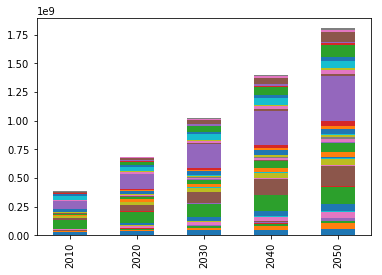

In [15]:
on_pop.transpose().plot(kind='bar',stacked=True, legend=False)

(0, 2000000000)

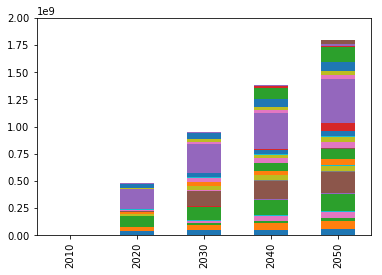

In [16]:
off_pop.transpose().plot(kind='bar',stacked=True, legend=False)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylim(0,2000000000)

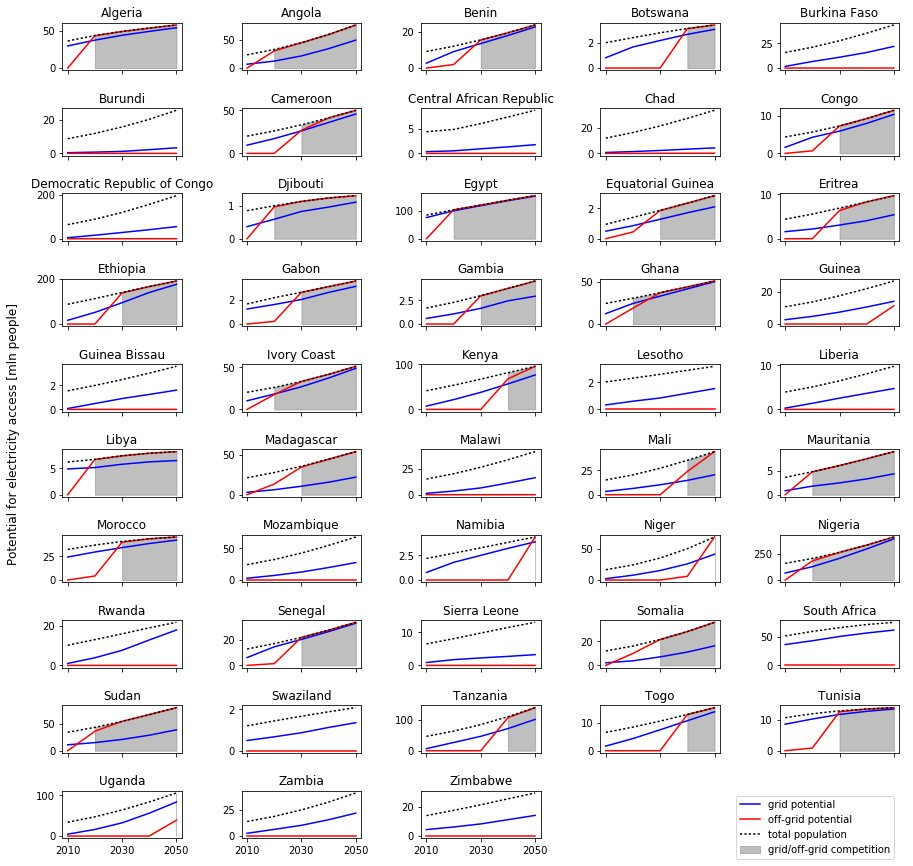

In [17]:
# Make a matrix of plots
rows = 10
cols = 5
fig, ax = plt.subplots(rows, cols, sharex='col') #, sharey='row')
fig.set_size_inches(15,15)
fig.subplots_adjust(hspace=0.8, wspace=0.5)

for i in range(rows):
    for j in range(cols):
        idx = cols*i + j
        if idx < len(on_pop_mil):
            on_line, = ax[i,j].plot(on_pop_mil.iloc[idx,:].transpose(),color='blue')
            off_line, = ax[i,j].plot(off_pop_mil.iloc[idx,:].transpose(),color='red')
            pop_line, = ax[i,j].plot(pop_mil.iloc[idx,:].transpose(),':',color='black')
            onoffsum = ax[i,j].fill_between(pop_mil.iloc[idx,:].transpose().index.astype(int),
                                            pop_mil.iloc[idx,:].transpose().values.astype(float),0,
                                            pop_mil.iloc[idx,:]<=onoff_sum_mil.iloc[idx,:], 
                                            color = 'grey', alpha = 0.5)
            ax[i,j].set_title(on_pop_mil.index[idx])
            ax[i,j].set_xticks([2010,2030,2050])
        elif idx == len(on_pop_mil):
            ax[i,j].axis('off')
            plt.legend([on_line,off_line,pop_line,onoffsum],
                       ['grid potential','off-grid potential','total population','grid/off-grid competition'])
        else:
            ax[i,j].axis('off')
            
# overall axes titles as text objects
fig.text(0.08, 0.5, 'Potential for electricity access [mln people]', ha='center', va='center', rotation='vertical', fontsize=12)

In [18]:
#fig.savefig("potential_mil_people.jpg",dpi=150)

Note: the gray area is just a rough approximation of when competition might occur, derived by selecting those periods for which the sum of on_pop and off_pop is higher than the total population. This is totally independent fromthe GIS analysis. For a more accurate estimate one should go back to the GIS maps and count the number of people in the overlapping green and the orange areas in each period. Let's do exactly that:

In QGIS (file on-off_analysis.qgs) import: 
- country boundaries (estrap_..._corrected.shp) and grid-lines
- pop_prj raster
- buffer layers from on-grid analysis
- access_pop_y rasters from off-grid analysis - these contain the people that have off-grid access.

Run zonal stats (sum and mean) on access_pop_y layers, with the buffer_y layers as vector files. The results are stored in the buffer layers. Let's then import them here:

In [19]:
buff_dir = acc_dir+"gis_layers\\on-grid_access\\buffers\\"
buffers = []
for y in on_pop.columns:
    b_name = 'buffer_%s_clip.shp'%y
    b = gpd.read_file(buff_dir+b_name)
    buffers.append(b.groupby('COUNTRY').sum().reset_index())

buffers[0].head()

,COUNTRY,2010,popsum,onoff_sum,onoff_mean
0,Algeria,20000.0,23954018.0,20346363.0,123.018284
1,Angola,18000.0,5282203.0,4114297.0,146.611812
2,Benin,1000.0,2737001.0,0.0,0.000000
3,Botswana,2000.0,624713.0,0.0,0.000000
4,Burkina Faso,500.0,1607366.0,0.0,0.000000


Column 'onoff_sum' contains the number of people living within the buffer, that have a WTP > LCOE of one of at least the off-grid techs, i.e. people that can afford electricity access from both the grid and off-grid solutions. 
Let's add a new column that expresses thes figures as a fraction of the total people in the buffer: 

In [20]:
for b in buffers:
    b.loc[:,'overlap_fraction'] = b.loc[:,'onoff_sum'] / b.loc[:,'popsum']
buffers[0].head()

,COUNTRY,2010,popsum,onoff_sum,onoff_mean,overlap_fraction
0,Algeria,20000.0,23954018.0,20346363.0,123.018284,0.849392
1,Angola,18000.0,5282203.0,4114297.0,146.611812,0.778898
2,Benin,1000.0,2737001.0,0.0,0.000000,0.000000
3,Botswana,2000.0,624713.0,0.0,0.000000,0.000000
4,Burkina Faso,500.0,1607366.0,0.0,0.000000,0.000000


In [21]:
# check that it's always a fraction of 1
for b in buffers:
    b[b.overlap_fraction > 1]

In [22]:
# put into one single DF:
cols = ['COUNTRY','overlap_fraction']
overlap_fraction = buffers[0][cols]
overlap_fraction.columns = ['COUNTRY','2010']
for b in buffers[1:]:
    y = b.columns[1]
    df = b[cols]
    df.columns = ['COUNTRY',y]
    overlap_fraction = overlap_fraction.merge(df,on='COUNTRY',how='left')

overlap_fraction = overlap_fraction.set_index('COUNTRY')    
for c in overlap_fraction.index:
    if c in to_remove:
        overlap_fraction = overlap_fraction.drop(c,axis=0)
overlap_fraction.head()

,2010,2020,2030,2040,2050
COUNTRY,,,,,
Algeria,0.849392,0.849775,0.851620,0.854942,0.853475
Angola,0.778898,0.847207,0.850226,0.856875,0.852747
Benin,0.000000,0.071251,0.886800,0.875463,0.876745
Botswana,0.000000,0.000000,0.000000,0.876191,0.874764
Burkina Faso,0.000000,0.000016,0.000021,0.000018,0.000019


In [23]:
# convert into number of people
overlap_pop = overlap_fraction * on_pop
overlap_pop_mil = overlap_fraction * on_pop_mil

In [24]:
# Renormalize to compensate for edge effects that lead to a 
# total potential > total population

tot_pop_estimate = on_pop - overlap_pop + off_pop
renorm_df = (tot_pop_estimate[tot_pop_estimate > pop] / pop[tot_pop_estimate > pop]).fillna(1)
#renorm_df.head()
on_pop = on_pop / renorm_df
overlap_pop = overlap_pop / renorm_df
overlap_pop.loc[:,'2010'] = 0
off_pop = off_pop / renorm_df

on_pop_mil = on_pop / 1000000.
overlap_pop_mil = overlap_pop / 1000000.
off_pop_mil = off_pop / 1000000.

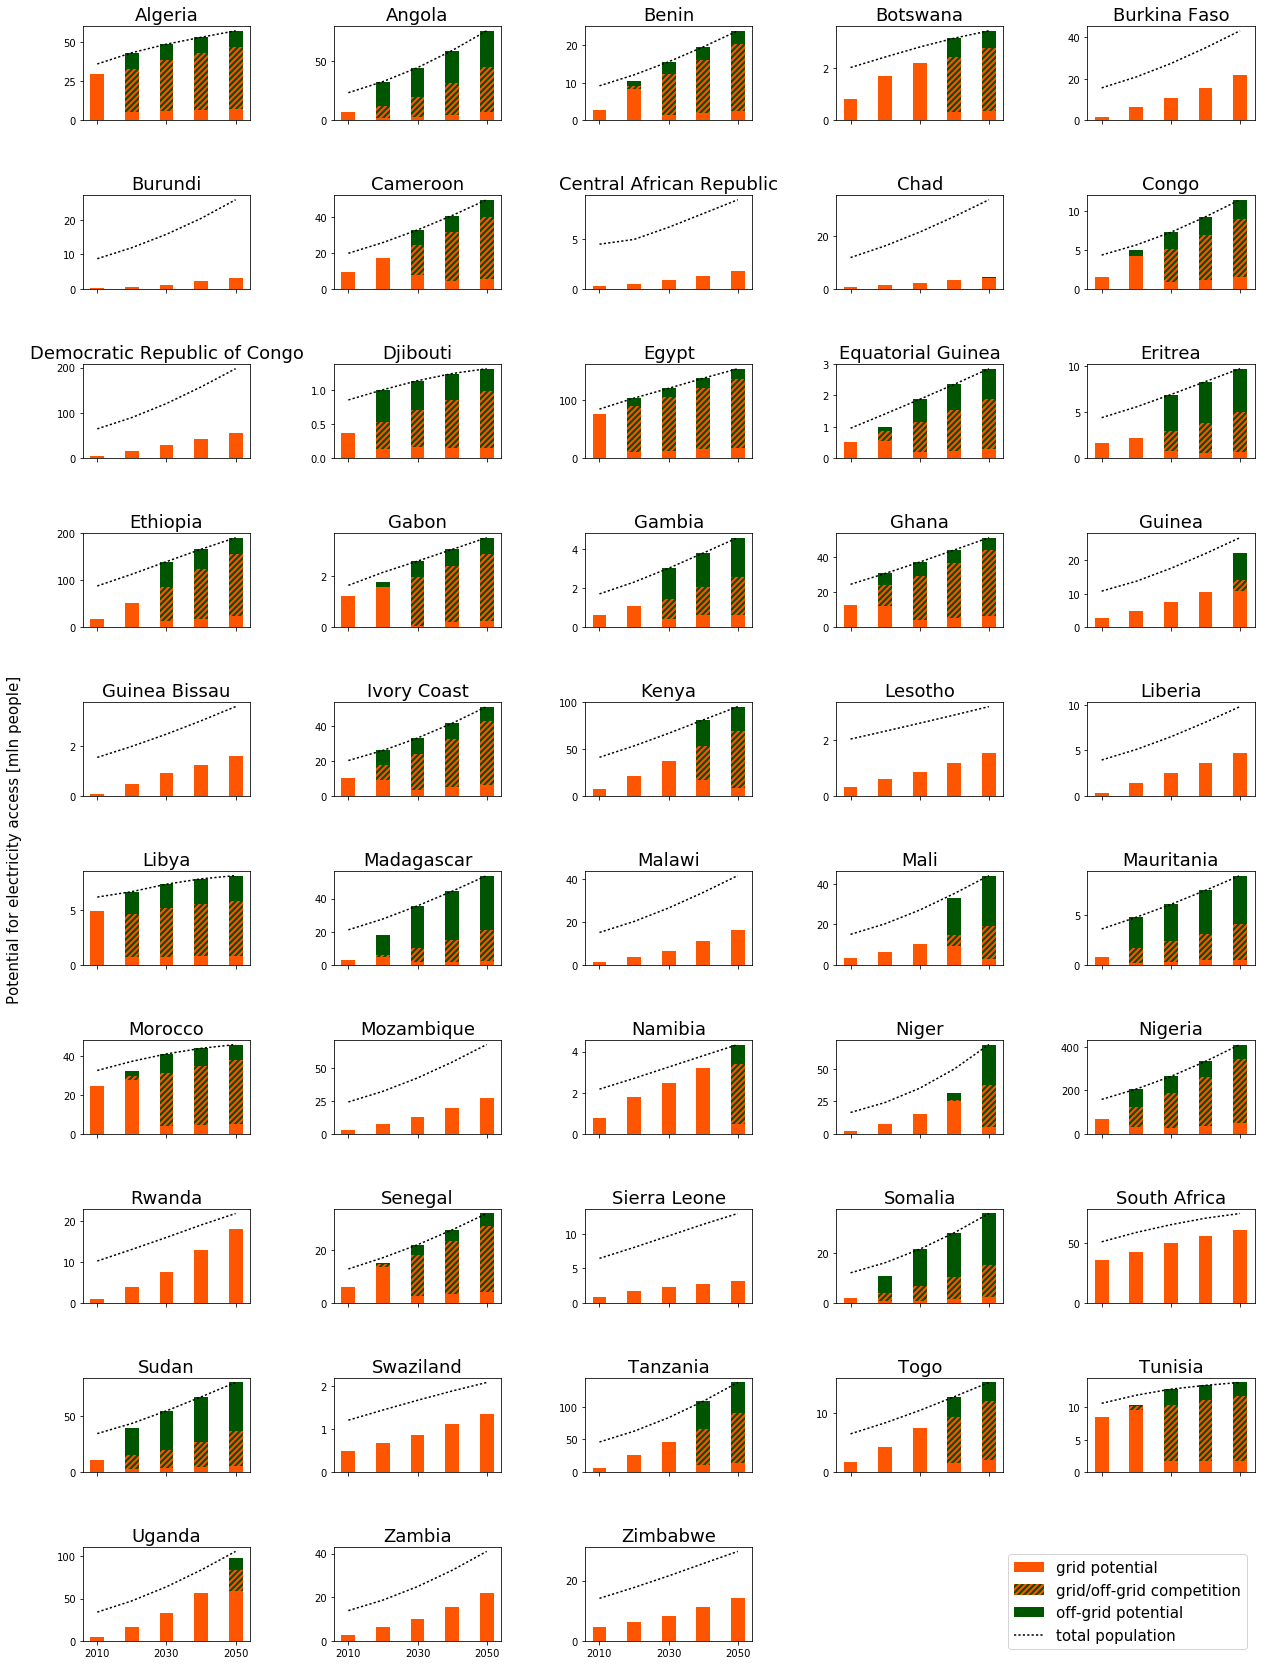

In [25]:
# Make a matrix of plots
rows = 10
cols = 5
fig, ax = plt.subplots(rows, cols, sharex='col') #, sharey='row')
fig.set_size_inches(21,29.7)
fig.subplots_adjust(hspace=0.8, wspace=0.5)

import matplotlib as mpl
bar_w = 4
orange = (254/255.,85/255.,0)
green = (0,85/255.,0)
mpl.rcParams['hatch.linewidth'] = 2
mpl.rcParams['hatch.color'] = orange
mpl.rcParams['font.size'] = 15
for i in range(rows):
    for j in range(cols):
        idx = cols*i + j
        if idx < len(on_pop_mil):
            on_line = ax[i,j].bar(on_pop_mil.columns.astype(float),\
                                  on_pop_mil.iloc[idx,:] - overlap_pop_mil.iloc[idx,:],\
                                  bar_w,color=orange)
            
            overlap_line = ax[i,j].bar(on_pop_mil.columns.astype(float),\
                                       overlap_pop_mil.iloc[idx,:],\
                                       bar_w, color=green,hatch='////',\
                                       bottom = (on_pop_mil.iloc[idx,:] - overlap_pop_mil.iloc[idx,:]))
            
            off_line = ax[i,j].bar(on_pop_mil.columns.astype(float),\
                                   off_pop_mil.iloc[idx,:] - overlap_pop_mil.iloc[idx,:],\
                                   bar_w, color=green,\
                                   bottom = on_pop_mil.iloc[idx,:])
            
            pop_line, = ax[i,j].plot(pop_mil.iloc[idx,:].transpose(),':',color='black')
            
            
            ax[i,j].set_title(on_pop_mil.index[idx])
            ax[i,j].set_xticks([2010,2030,2050])
        elif idx == len(on_pop_mil):
            ax[i,j].axis('off')
            plt.legend([on_line,overlap_line,off_line,pop_line],
                       ['grid potential','grid/off-grid competition','off-grid potential','total population'])
        else:
            ax[i,j].axis('off')
            
# overall axes titles as text objects
fig.text(0.08, 0.5, 'Potential for electricity access [mln people]', ha='center', va='center', rotation='vertical')

In [26]:
#fig.savefig('access_potential.jpg',dpi=150)

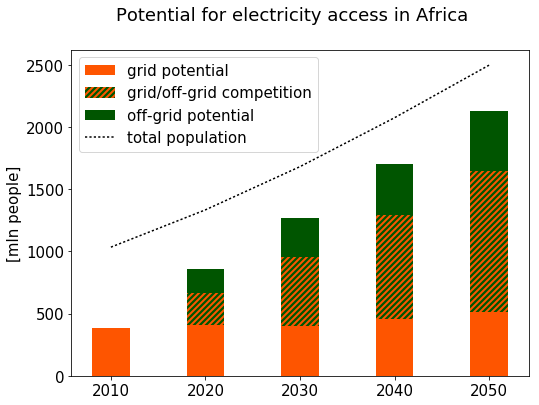

In [27]:
# And for the whole of Africa
fig, ax = plt.subplots()
fig.set_size_inches(8.2,6)
on_line = ax.bar(on_pop_mil.columns.astype(float),\
                 on_pop_mil.sum() - overlap_pop_mil.sum(),\
                 bar_w,color=orange)
            
overlap_line = ax.bar(on_pop_mil.columns.astype(float),\
                      overlap_pop_mil.sum(),\
                      bar_w, color=green,hatch='////',\
                      bottom = (on_pop_mil.sum() - overlap_pop_mil.sum()))
            
off_line = ax.bar(on_pop_mil.columns.astype(float),\
                 off_pop_mil.sum() - overlap_pop_mil.sum(),\
                 bar_w, color=green,\
                 bottom = on_pop_mil.sum())
            
pop_line, = ax.plot(pop_mil.sum().transpose(),':',color='black')
            

#ax.set_title("Africa")
#ax.set_xticks([2010,2030,2050])
plt.legend([on_line,overlap_line,off_line,pop_line],
           ['grid potential','grid/off-grid competition','off-grid potential','total population'])
 
# overall title and y-axis label
fig.suptitle('Potential for electricity access in Africa')            
ax.set_ylabel('[mln people]')

In [28]:
#fig.savefig('access_potential_afr.jpg',dpi=150)

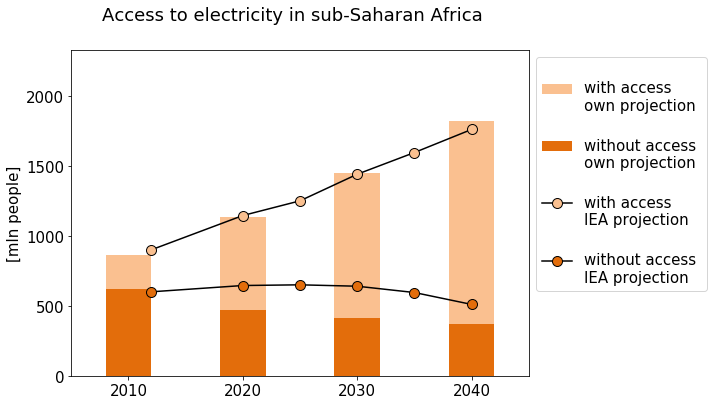

In [29]:
import textwrap as tw

# overall summary for SSA to compare with IEA prj
# North Africa
NAC = ['Morocco','Algeria','Tunisia','Libya','Egypt']
# Sub-Saharan Africa
SSA = [c for c in pop.index if c not in NAC]

# bar colors
IEA_acc_color = (250/255.,192/255.,144/255.)
IEA_noacc_color = (227/255.,109/255.,11/255.)

# IEA prjs
x_IEA = np.array([2012,2020,2025,2030,2035,2040])
acc_IEA = np.array([300,500,600,800,1000,1250])
no_acc_IEA = np.array([600,645,650,640,595,510])

# plot
fig, ax = plt.subplots()
fig.set_size_inches(8.2,6)

no_acc_line = ax.bar(on_pop_mil.columns.astype(float),\
                     pop_mil.loc[SSA,:].sum() -\
                     (on_pop_mil.loc[SSA,:].sum() + off_pop_mil.loc[SSA,:].sum() - overlap_pop_mil.loc[SSA,:].sum()),\
                     bar_w,color=IEA_noacc_color)

acc_line = ax.bar(on_pop_mil.columns.astype(float),\
                  on_pop_mil.loc[SSA,:].sum() + off_pop_mil.loc[SSA,:].sum() - overlap_pop_mil.loc[SSA,:].sum(),\
                  bar_w,color=IEA_acc_color,\
                  bottom = pop_mil.loc[SSA,:].sum() -\
                           (on_pop_mil.loc[SSA,:].sum() + off_pop_mil.loc[SSA,:].sum() - overlap_pop_mil.loc[SSA,:].sum())
                 )

iea_no_acc_line, = ax.plot(x_IEA,no_acc_IEA,'o-',color='k',\
                                           markersize=10,\
                                           markerfacecolor=IEA_noacc_color,\
                                           markeredgecolor='k')
iea_acc_line, = ax.plot(x_IEA,no_acc_IEA+acc_IEA, 'o-', color='k',\
                                                       markersize=10,\
                                                       markerfacecolor=IEA_acc_color,\
                                                       markeredgecolor='k')

#on_line = ax.bar(on_pop_mil.columns.astype(float),\
#                 on_pop_mil.sum() - overlap_pop_mil.sum(),\
#                 bar_w,color=orange)
#            
#overlap_line = ax.bar(on_pop_mil.columns.astype(float),\
#                      overlap_pop_mil.sum(),\
#                      bar_w, color=green,hatch='////',\
#                      bottom = (on_pop_mil.sum() - overlap_pop_mil.sum()))
#            
#off_line = ax.bar(on_pop_mil.columns.astype(float),\
#                 off_pop_mil.sum() - overlap_pop_mil.sum(),\
#                 bar_w, color=green,\
#                 bottom = on_pop_mil.sum())
#            
#pop_line, = ax.plot(pop_mil.sum().transpose(),':',color='black')
            

#ax.set_title("Africa")
ax.set_xlim(2005,2045)
ax.set_xticks([2010,2020,2030,2040])

lgd = plt.legend([acc_line,no_acc_line,iea_acc_line,iea_no_acc_line],\
           ['\nwith access \nown projection','\nwithout access \nown projection',\
            '\nwith access \nIEA projection','\nwithout access \nIEA projection'],\
           loc='upper left', bbox_to_anchor=(1, 1))
 
# overall title and y-axis label
fig.suptitle('Access to electricity in sub-Saharan Africa')            
ax.set_ylabel('[mln people]')

In [30]:
#fig.savefig('SSA_alt.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=150)

# Demand

We have time series of residential electricity use per person from gap-minder. This is roughly log-log-proportional to the GDP per person. Some countries are missing from the series. We can use the propotional relation to estimate the residential elc use per person for these countries.

We do this for the year 2005 (start year of TIAM-ECN). From the residential electricity use per person we can then derive the total residential electricity use by multiplying by the poulation, and finally the residential electricity use per **connected** person by dividing by the electricity access:   

$$ RE_{TOT} = RE_{PP} \times POP $$
$$ RE_{PCP} = \frac{RE_{PP}}{ACC_{2005}} $$

This way we can estimate the electricity tier in 2005.

Now we are equipped to make projections. We need to: 
1. Check that $RE_{TOT}(2005)$ for the TIAM regions is in line with the figures we have in the model's demand database;
2. Project to 2010 - 2050

As countries move forward their total residential electricity demand will grow according to (i) the projections of connected people we estimated through the GIS analysis (see plots above), and (ii) their GDP. The latter effect  captures the fact that as people become richer and technologies become cheaper the average person will move towards a higher electricty tier. Therefore we project the demand as follows: 
- **2010**:

$$ RE_{TOT}(2010) = RE_{PP}(2005) \times POP(2010) $$
I.e.: same tier, we just adjust the number of peopulation. 


- **2020 onwards**: 

We project according to the growth in connected population, and we capture possible tier changes by also factoring in the GDP growth:
$$ RE_{TOT}(y) = RE_{TOT}(2010) \times \bigg(\frac{cPOP(y)}{cPOP(2010)}\bigg)^{DF_{POP}(y)} \times \bigg(\frac{GDP(y)}{GDP(2020)}\bigg)^{DF_{GDP}(y)}, $$
c stands for *connected*, and DF are decoupling factors.  

Finally we divide the projected demand into grid, off-grid and overlap, according to the analogous subdivision of the potential (see graphs above).

In [31]:
# residential electricty use per person from GapMinder
res_elc_pp = pd.read_csv(data_dir+'res_elc_pp.csv')
res_elc_pp.head()

,geo,time,residential_electricity_use_per_person
0,ago,1971,67.63
1,ago,1972,74.65
2,ago,1973,85.81
3,ago,1974,107.90
4,ago,1975,116.60


In [32]:
# formatting res_elc_pp
res_elc_pp.loc[:,'Country Code'] = res_elc_pp.loc[:,'geo'].str.upper()
res_elc_pp = res_elc_pp[res_elc_pp.time >=1990].pivot_table(index='Country Code',\
                                                            columns='time',\
                                                            values='residential_electricity_use_per_person')
res_elc_pp.head()

time,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Country Code,,,,,,,,,,,,,,,,,,,
AGO,52.11,51.24,50.03,49.0,48.1,47.03,49.08,67.25,72.0,71.63,76.14,84.92,89.38,98.35,107.1,122.6,134.4,147.2,173.0
ALB,219.70,160.60,175.30,226.5,230.9,259.70,344.20,322.40,436.0,642.50,709.10,689.20,875.20,853.90,787.5,767.2,552.1,575.0,636.3
ARE,3678.00,3641.00,3832.00,4361.0,4668.0,4853.00,5034.00,5210.00,5380.0,5546.00,5706.00,5860.00,6010.00,6640.00,6919.0,7358.0,8223.0,9340.0,11150.0
ARG,336.70,358.80,393.60,426.9,456.7,484.20,493.20,511.50,523.5,555.00,570.20,578.00,554.40,557.10,575.1,614.7,653.5,708.6,768.4
ARM,606.30,699.80,717.30,420.0,310.3,208.90,353.90,794.80,578.6,531.00,512.20,487.90,496.50,533.50,549.7,577.7,574.3,594.7,603.8


In [33]:
# GDP from WB
gdp_pp_his = pd.read_excel(data_dir+'GDP_PPP.xlsx',sheet_name='Data',skiprows=3)
gdp_pp_his = gdp_pp_his.replace(to_replace,replacements)
#gdp_pp[gdp_pp['Country Name'].isin(replacements)]
gdp_pp_his.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35973.780510,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1210.479265,1247.066144,1482.098837,1581.600836,1660.739856,1873.153946,1877.411953,1875.447407,1861.124332,1876.544682
2,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5128.361253,5743.110048,5718.694408,5775.864013,5911.254334,6109.136612,6400.673376,6594.397826,6634.402274,6499.067104
3,Albania,ALB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7289.632366,8228.357428,8823.802984,9646.615727,10207.700674,10526.248328,10584.446919,11325.321568,11504.748238,11928.536563
4,Andorra,AND,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Formatting gdp_pp
gdp_pp = gdp_pp_his.drop(['Country Name','Indicator Name','Indicator Code'],axis=1).set_index('Country Code')
gdp_pp = gdp_pp[[c for c in gdp_pp.columns if (int(c)>=1990 and int(c)<=2008)]]
gdp_pp.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Country Code,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,875.517610,922.829449,916.334475,1011.595524,1065.619665,1210.479265,1247.066144
AGO,2840.200763,2811.287126,2591.326276,1932.804031,1978.438032,2162.917203,2380.132838,2541.712498,2670.620030,2721.155559,2781.258140,2870.036714,2620.889012,2715.943441,2985.598585,3516.402658,4222.663033,5128.361253,5743.110048
ALB,2721.615212,1992.073688,1902.286383,2147.575112,2389.946945,2781.413989,3109.183498,2837.351504,3208.957773,3690.688729,4026.537422,4463.632986,4754.675856,5114.784779,5524.921661,5942.870083,6634.779222,7289.632366,8228.357428
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


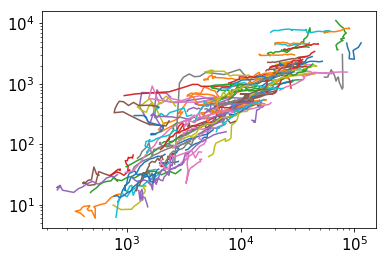

In [35]:
# plot the correlation between residential elc use and gdp for the whole world
for c in gdp_pp.index:
    try:
        plt.loglog(gdp_pp.loc[c,:],res_elc_pp.loc[c,:])
    except(KeyError):
        pass

In [36]:
# import region names
regions = pd.read_excel(data_dir+'country_mapping.xlsx',sheet_name='regions')
regions.head()

,REG-TIAM_15,REG-TIAM_36 Region Name,COUNTRY_ISO,Country Name,COUNTRY_UNPD,COUNTRY,REG-TIAM_all,Color code,Group,Unnamed: 9,Country dict,Unnamed: 11,Region dict,Unnamed: 13,Unnamed: 14,"""COUNTRY_ISO"",""REG-TIAM_all"""
0,AFR,Western Africa,XXX,(blank),(blank),(blank),AWE,#B3CD1C,Africa,"'XXX': ['XXX','(blank)', '(blank)'],","'XXX': ['XXX','(BLANK)', '(BLANK)'],",NaN,"'XXX': 'AWE',",NaN,NaN,"""XXX"",""AWE"""
1,AFR,Algeria,DZA,Algeria,Algeria,Algeria,DZA,#F6EF80,Africa,"'DZA': ['DZA','Algeria', 'Algeria'],","'DZA': ['DZA','ALGERIA', 'ALGERIA'],",NaN,"'DZA': 'DZA',",NaN,NaN,"""DZA"",""DZA"""
2,AFR,Angola,AGO,Angola,Angola,Angola,AGO,#B693C4,Africa,"'AGO': ['AGO','Angola', 'Angola'],","'AGO': ['AGO','ANGOLA', 'ANGOLA'],",NaN,"'AGO': 'AGO',",NaN,NaN,"""AGO"",""AGO"""
3,AFR,Western Africa,BEN,Benin,Benin,Benin,AWE,#B3CD1C,Africa,"'BEN': ['BEN','Benin', 'Benin'],","'BEN': ['BEN','BENIN', 'BENIN'],",NaN,"'BEN': 'AWE',",NaN,NaN,"""BEN"",""AWE"""
4,AFR,Southern Africa,BWA,Botswana,Botswana,Botswana,ASO,#EA4F58,Africa,"'BWA': ['BWA','Botswana', 'Botswana'],","'BWA': ['BWA','BOTSWANA', 'BOTSWANA'],",NaN,"'BWA': 'ASO',",NaN,NaN,"""BWA"",""ASO"""


In [37]:
# select african countries
african_countries = regions[regions['REG-TIAM_15']=='AFR']['COUNTRY_ISO'].unique()
african_countries

array(['XXX', 'DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CMR', 'CPV',
       'CAF', 'TCD', 'COM', 'COG', 'CIV', 'COD', 'DJI', 'EGY', 'GNQ',
       'ERI', 'ETH', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO',
       'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MYT', 'MAR',
       'MOZ', 'NAM', 'NER', 'NGA', 'REU', 'RWA', 'SHN', 'STP', 'SEN',
       'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'SWZ', 'TGO', 'TUN',
       'UGA', 'TZA', 'ESH', 'ZMB', 'ZWE'], dtype=object)

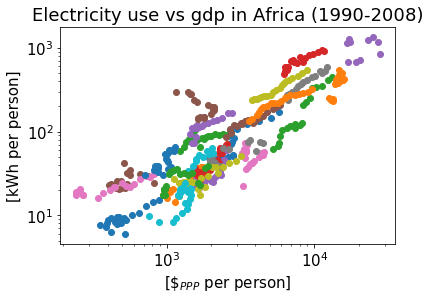

In [38]:
# residential elc and gdp correlation for african countries
for c in gdp_pp.index:
    if c in african_countries:
        try:
            plt.loglog(gdp_pp.loc[c,:],res_elc_pp.loc[c,:],'o')
        except(KeyError):
            pass
plt.title('Electricity use vs gdp in Africa (1990-2008)')
plt.ylabel('[kWh per person]')
plt.xlabel('[\$$_{PPP}$ per person]')

#plt.gcf().savefig('corr_eluse_gdp_afr.jpg',bbox_inches='tight', dpi = 150)

### Demand per person in 2005 

We use a linear regression of residential electricity use vs gdp for the missing countries.

In [39]:
# From the plot above: 
# We select just 2005 data for African countries
# and store them in a new DF
rg2005 = pd.DataFrame(res_elc_pp.loc[[c for c in african_countries if c in res_elc_pp.index],2005])
rg2005.columns = ['res_elc']
rg2005.loc[:,'gdp'] = gdp_pp.loc[:,'2005']
rg2005.head()

,res_elc,gdp
Country Code,,
DZA,532.70,10971.517420
AGO,122.60,3516.402658
BEN,36.87,1545.698265
BWA,345.20,10313.611186
CMR,30.50,2347.659063


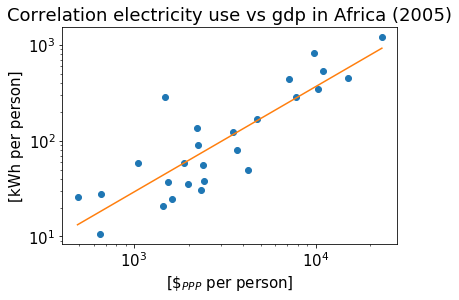

In [40]:
# We then make a fit a line through the data points
fit = np.polyfit(np.log(rg2005.gdp), np.log(rg2005.res_elc),1)

plt.loglog(rg2005.gdp, rg2005.res_elc, 'o') #, np.log(rg2005.gdp),np.poly1d(fit)(np.log(rg2005.gdp)))
plt.loglog(rg2005.sort_values(by='gdp').gdp,\
           np.exp(np.poly1d(fit)(np.log(rg2005.sort_values(by='gdp').gdp))),'-')

plt.title('Correlation electricity use vs gdp in Africa (2005)')
plt.ylabel('[kWh per person]')
plt.xlabel('[\$$_{PPP}$ per person]')

#plt.gcf().savefig('corr_elc_use_gdp_2005.jpg',bbox_inches='tight', dpi=150)

In [41]:
# let's bring back the country names
gdp = gdp_pp_his[gdp_pp_his['Country Name'].isin(pop.index)]
gdp2005 = gdp[['Country Code','Country Name','2005']].set_index('Country Code')
len(gdp2005)

48

In [42]:
# check for NaNs 
gdp2005[gdp2005['2005'].isnull()]

,Country Name,2005
Country Code,,
SOM,Somalia,NaN


In [43]:
# To fix somalia, let's use TIAM regional averages
gdp2005 = gdp2005.reset_index()\
                 .merge(regions[['Country Name','REG-TIAM_all']] ,how='left', on='Country Name')\
                 .set_index('Country Code')
len(gdp2005)

48

In [44]:
# iterate through nans and fill with regional averages
for i in gdp2005[gdp2005['2005'].isnull()].index:
    gdp2005.loc[i,'2005'] = gdp2005.groupby('REG-TIAM_all').mean().loc[gdp2005.loc[i,'REG-TIAM_all'],'2005']
len(gdp2005)

48

In [45]:
# add residential electricity 
gdp2005.loc[:,'res_elc'] = res_elc_pp.loc[:,2005]
len(gdp2005)

48

In [46]:
for i in gdp2005.index:
    if np.isnan(gdp2005.loc[i,'res_elc']):
        gdp2005.loc[i,'res_elc_fit'] = np.exp(np.poly1d(fit)(np.log(gdp2005.loc[i,'2005'])))
    else:
        gdp2005.loc[i,'res_elc_fit'] = gdp2005.loc[i,'res_elc']
len(gdp2005)

48

In [47]:
dem_pp_2005 = gdp2005[['Country Name','res_elc_fit']].set_index('Country Name')
dem_pp_2005.columns = ['2005']
#dem_pp_2005


### Demand per connected person
This should give an estimate of the tier. 

In [48]:
# import elc-access figures
el_acc = pd.read_excel("input_data\\el_acc.xlsx",sheet_name='Data',skiprows=3)

# create dem per connected person df:
dem_pcp_2005 = dem_pp_2005.reset_index()
dem_pcp_2005.columns = ['COUNTRY','dem_pp']
dem_pcp_2005 = dem_pcp_2005.merge(el_acc[['COUNTRY','2005']], on='COUNTRY')
dem_pcp_2005.columns = ['COUNTRY','dem_pp','el_acc']
dem_pcp_2005 = dem_pcp_2005.set_index('COUNTRY')

dem_pcp_2005.loc[:,'2005'] = 100 * dem_pcp_2005.loc[:,'dem_pp'] / dem_pcp_2005.loc[:,'el_acc'] # demand PCP in kWh
dem_pcp_2005 = dem_pcp_2005.drop(['dem_pp','el_acc'],axis=1)
#dem_pcp_2005

In [49]:
tier_2005 = dem_pcp_2005 / 365.
tier_2005.columns = ['daily_kWh']
def get_tier(x):
    """get the tier from daily el cons"""
    if x < 0.012:
        r = 0
    elif x >= 0.012 and x < 0.2: 
        r = 1
    elif x >= 0.2 and x < 1.0: 
        r = 2
    elif x >= 1.0 and x < 3.4: 
        r = 3
    elif x >= 3.4 and x < 8.2: 
        r = 4
    elif x >= 8.2: 
        r = 5
    else:
        r = np.nan
    return r
        
tier_2005.loc[:,'tier'] = tier_2005.loc[:,'daily_kWh'].apply(get_tier)
#tier_2005

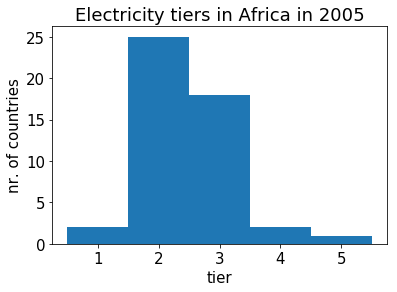

In [50]:
ax = tier_2005.groupby('tier').count().plot(kind='bar', rot=0, width=1, legend=False)
ax.set_ylabel('nr. of countries')
ax.set_title('Electricity tiers in Africa in 2005')
#ax.get_figure().savefig('elc_tiers_2005.jpg', dpi=150)

### Demand projection

In [51]:
# We need GDP growth factors and % of pop with electricity access
gc = pd.read_excel(data_dir+"\\gdp_coeff.xlsx", sheet_name="Data").set_index('REG-TIAM_all')

# turn them into multipliers by adding1 and taking the 5th power
gc = (gc+1)**5 

# normalize
# take the cumulative products 
# (so that later we only need to multiply the 2010 value)
gc = gc.cumprod(axis=1)

gc = gc.reset_index()

# let's save the gcs per region in a separate DF that we will use later for the final TIAM input projections
gc_reg = gc[['REG-TIAM_all','2010','2020','2030','2040','2050','2060','2070','2080','2090','2100']]

# Let's now redifine gc for the first half of the century
gc = gc.merge(regions,on='REG-TIAM_all',how='left')
gc = gc[['COUNTRY','2010','2020','2030','2040','2050']]
gc = gc[gc.COUNTRY.isin(pop.index)].set_index('COUNTRY')
len(gc)
gc

,2010,2020,2030,2040,2050
COUNTRY,,,,,
Morocco,1.617690,2.516439,4.050420,6.320332,9.199180
Algeria,1.476789,2.253944,3.627912,5.661046,8.239595
Tunisia,1.540060,2.233846,3.595562,5.610566,8.166123
Libya,1.556926,0.871331,1.362847,2.046630,2.886920
Egypt,1.604984,2.314140,3.724803,5.812235,8.459649
Benin,1.487002,3.012152,5.653002,9.519631,15.469556
Burkina Faso,1.487002,3.012152,5.653002,9.519631,15.469556
Ivory Coast,1.487002,3.012152,5.653002,9.519631,15.469556
Gambia,1.487002,3.012152,5.653002,9.519631,15.469556


In [52]:
# Dataframe with pop in 2005 and correct country names

fi = pop_data['Indicator Name']=='Population, total'
pop_2005 = pop_data[fi][['Country Code','2005']]

fc = pop_2005['Country Code'].isin(gdp2005.index)
pop_2005 = pop_2005[fc].merge(gdp2005.reset_index()[['Country Code','Country Name']], on='Country Code')
pop_2005 = pop_2005[['Country Name','2005']]
pop_2005.columns = ['COUNTRY','2005']

pop_2005 = pop_2005.set_index('COUNTRY')
#pop_2005.head()

# Merge into pop df
pop.loc[:,'2005'] = pop_2005.loc[:,'2005']
#pop

In [53]:
def last_year_no_off(c):
    """
    For country c, returns the last year in which 
    the offgrid population projection was zero
    """
    df = off_pop.loc[c,:]
    return max(df[df.values==0].index)

#for c in off_pop.index:
#    print( c, last_year_no_off(c))

In [54]:
# total demand: 
tot_dem = on_pop.drop(on_pop.columns, axis=1) # initiate DF
tot_dem.loc[:,'2005'] = pop.loc[:,'2005'] * dem_pp_2005.loc[:,'2005'] * 3.6e-9  # total PJ
tot_dem.loc[:,'2010'] = pop.loc[:,'2010'] * dem_pp_2005.loc[:,'2005'] * 3.6e-9  # total PJ
#tot_dem.loc[:,'2010'] = on_pop.loc[:,'2010'] * dem_pcp_2005.loc[:,'2005'] * 3.6e-9  # total PJ

#on_dem

In [55]:
# make an overview of 2005 REA per TIAM-ECN region to compare with existing values in the DB
dem2005 = tot_dem.reset_index()
dem2005 = dem2005.merge(regions[['COUNTRY','REG-TIAM_all']] ,how='left', on='COUNTRY')
dem2005.groupby('REG-TIAM_all').sum().to_clipboard()
#dem2005 
# There are some large differences (up to 50-60%), but we still keep these results as leading

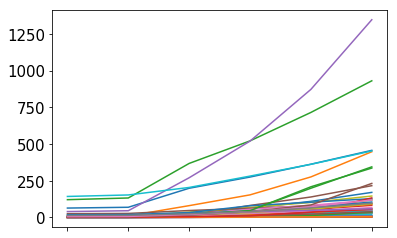

In [56]:
# total demand
DFp = 1.0  # main driver is population --> exponent > 1
DFg = 0.4  # secondary driver is GDP --> same exponent as in WTP projection
years_tot = ['2020','2030','2040','2050']
for y in years_tot: 
    tot_dem.loc[:,y] = tot_dem.loc[:,str(int(y)-10)] * ((on_pop.loc[:,y] + off_pop.loc[:,y]) /\
                                                (on_pop.loc[:,str(int(y)-10)] + off_pop.loc[:,str(int(y)-10)])\
                                                     ) ** DFp\
                                                   * (gc.loc[:,y] / gc.loc[:,str(int(y)-10)]) ** DFg
tot_dem.transpose().plot(legend=False)

In [57]:
on_dem = tot_dem * on_pop / (on_pop + off_pop - overlap_pop)
off_dem = tot_dem * off_pop / (on_pop + off_pop - overlap_pop)
overlap_dem = tot_dem * overlap_pop / (on_pop + off_pop - overlap_pop)

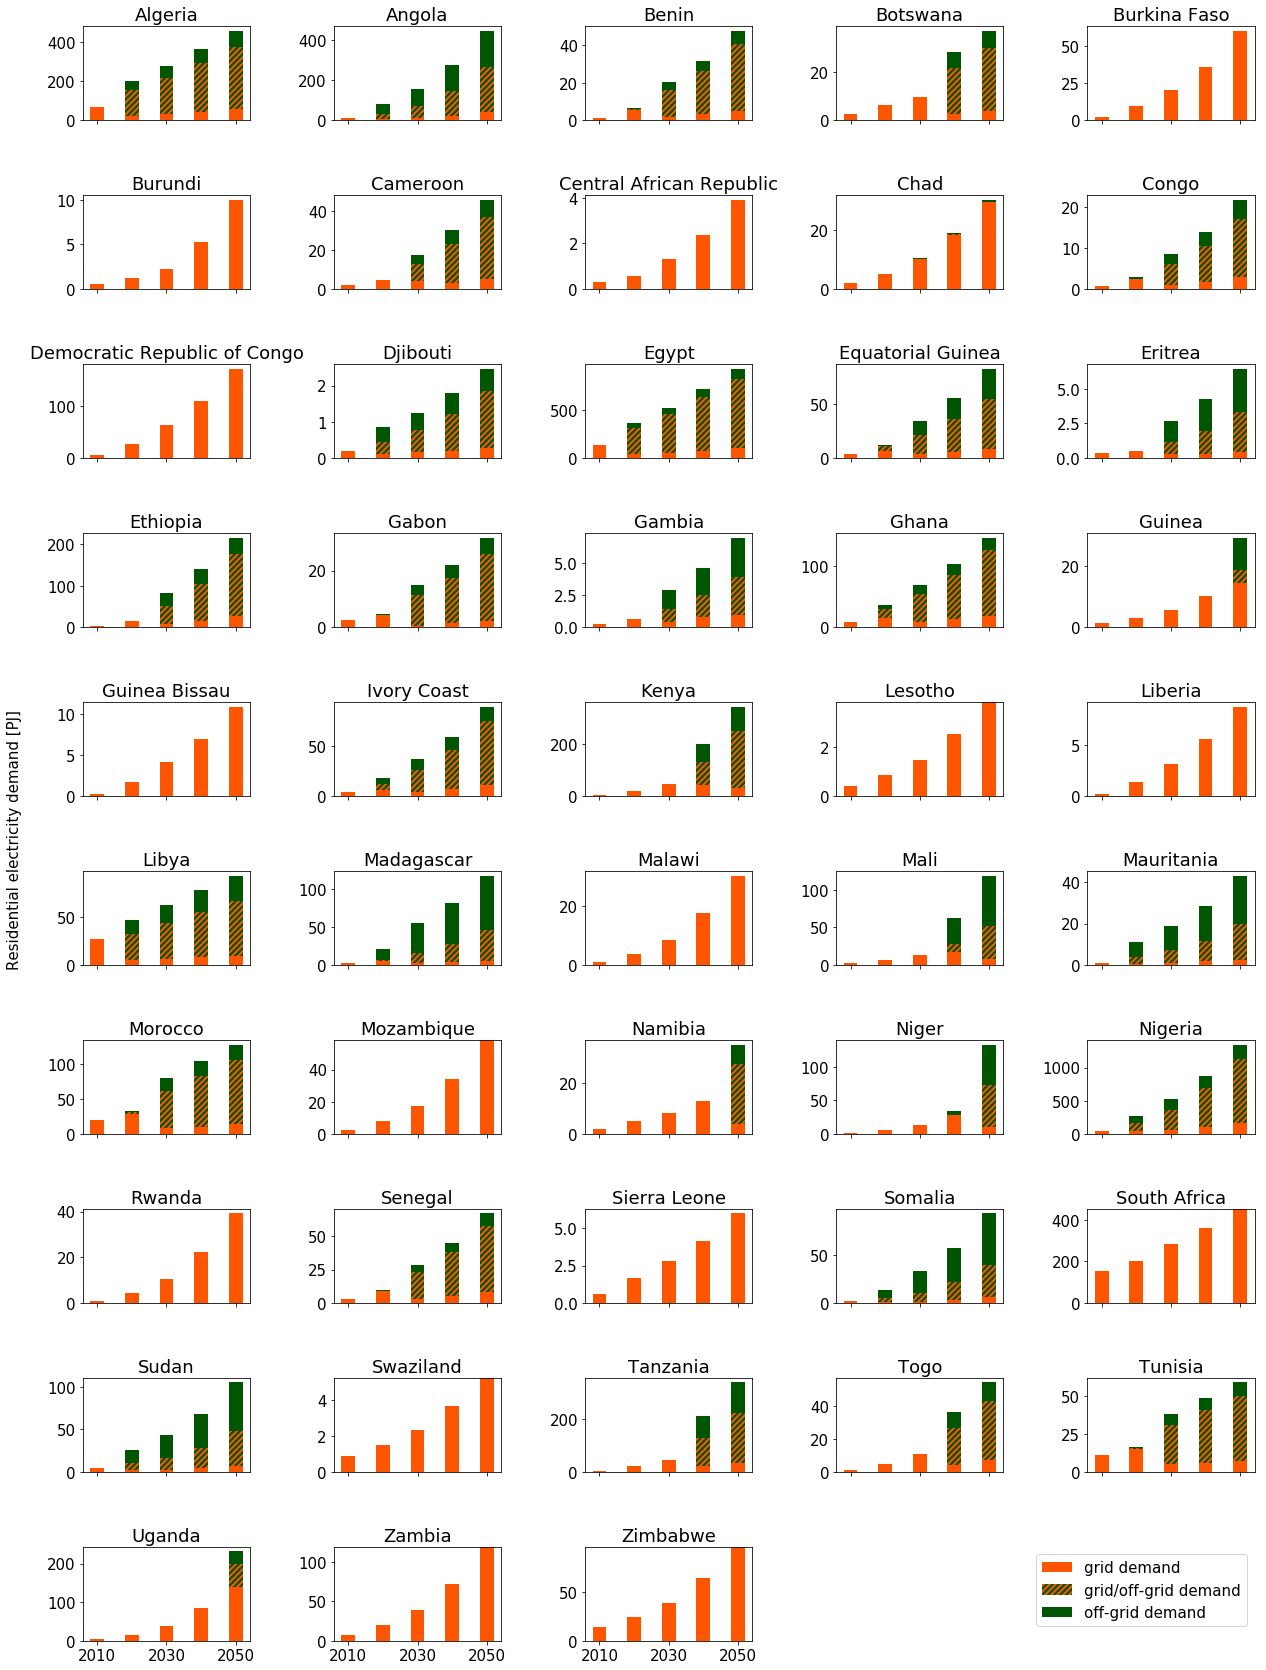

In [58]:
# Make a matrix of plots
rows = 10
cols = 5
fig, ax = plt.subplots(rows, cols, sharex='col') #, sharey='row')
fig.set_size_inches(21,29.7)
fig.subplots_adjust(hspace=0.8, wspace=0.5)

import matplotlib as mpl
bar_w = 4
orange = (254/255.,85/255.,0)
green = (0,85/255.,0)
mpl.rcParams['hatch.linewidth'] = 2
mpl.rcParams['hatch.color'] = orange
mpl.rcParams['font.size'] = 15
for i in range(rows):
    for j in range(cols):
        idx = cols*i + j
        if idx < len(tot_dem):
            on_line = ax[i,j].bar(on_dem.columns.astype(float),\
                                  on_dem.iloc[idx,:] - overlap_dem.iloc[idx,:],\
                                  bar_w,color=orange)
            
            overlap_line = ax[i,j].bar(on_dem.columns.astype(float),\
                                       overlap_dem.iloc[idx,:],\
                                       bar_w, color=green,hatch='////',\
                                       bottom = (on_dem.iloc[idx,:] - overlap_dem.iloc[idx,:]))
            
            off_line = ax[i,j].bar(on_dem.columns.astype(float),\
                                   off_dem.iloc[idx,:] - overlap_dem.iloc[idx,:],\
                                   bar_w, color=green,\
                                   bottom = on_dem.iloc[idx,:])
            
            #pop_line, = ax[i,j].plot(pop_mil.iloc[idx,:].transpose(),':',color='black')
            
            
            ax[i,j].set_title(on_pop_mil.index[idx])
            ax[i,j].set_xticks([2010,2030,2050])
        elif idx == len(on_pop_mil):
            ax[i,j].axis('off')
            plt.legend([on_line,overlap_line,off_line], #,pop_line],
                       ['grid demand','grid/off-grid demand','off-grid demand'])
        else:
            ax[i,j].axis('off')
            
# overall axes titles as text objects
fig.text(0.08, 0.5, 'Residential electricity demand [PJ]', ha='center', va='center', rotation='vertical')

# save
fig.savefig('demand.jpg',dpi=150)

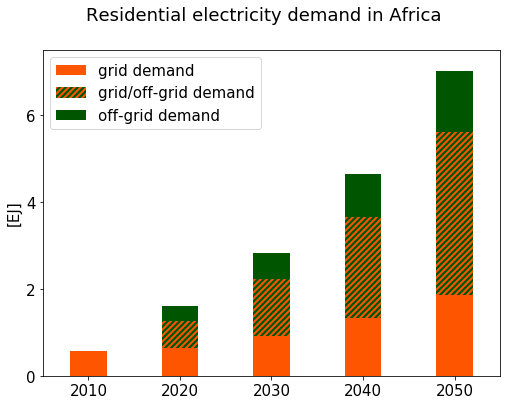

In [67]:
# And for the whole of Africa
fig, ax = plt.subplots()
fig.set_size_inches(8.2,6)
on_line = ax.bar(on_dem.columns.astype(float),\
                 on_dem.sum()/1000 - overlap_dem.sum()/1000,\
                 bar_w,color=orange)
            
overlap_line = ax.bar(on_dem.columns.astype(float),\
                      overlap_dem.sum()/1000,\
                      bar_w, color=green,hatch='////',\
                      bottom = (on_dem.sum() - overlap_dem.sum())/1000)
            
off_line = ax.bar(on_dem.columns.astype(float),\
                  off_dem.sum()/1000 - overlap_dem.sum()/1000,\
                  bar_w, color=green,\
                  bottom = on_dem.sum()/1000)
            
#pop_line, = ax.plot(pop_mil.sum().transpose(),':',color='black')
            

#ax.set_title("Africa")
#ax.set_xticks([2010,2030,2050])
plt.legend([on_line,overlap_line,off_line], #,pop_line],
           ['grid demand','grid/off-grid demand','off-grid demand'])
 
# overall title and y-axis label
fig.suptitle('Residential electricity demand in Africa')            
ax.set_ylabel('[EJ]')
ax.set_xlim(2005, 2055)
ax.set_ylim(0, 7.5)
ax.set_yticks([0,2,4,6])

# save
fig.savefig('demand_afr.jpg',dpi=150)

In [60]:
# create demand tables for exporting:
# off and overlap_dem: put 2005 to 0
off_exp = off_dem.fillna(0)
overlap_exp = overlap_dem.fillna(0)
# on_dem: put 2005 to dem2005
dem2005 = dem2005.set_index('COUNTRY')
on_exp = dem2005[['2005']]
for y in ['2010','2020','2030','2040','2050']:
    on_exp.loc[:,y] = on_dem.loc[:,y] - overlap_dem.loc[:,y]
on_exp.head()

C:\Users\dallalongaf\AppData\Local\Enthought\Canopy\edm\envs\CepPy3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\dallalongaf\AppData\Local\Enthought\Canopy\edm\envs\CepPy3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,2005,2010,2020,2030,2040,2050
COUNTRY,,,,,,
Algeria,63.837901,69.263515,22.800248,32.300458,42.566438,55.034391
Angola,8.629710,10.314200,4.695039,10.294863,21.083147,38.993474
Benin,1.059497,1.221036,5.347284,1.829082,3.278233,5.034593
Botswana,2.306304,2.503914,6.150369,9.624161,2.711783,3.761349
Burkina Faso,1.557527,1.810883,9.501414,20.196512,35.726195,60.414086


In [61]:
# group by tiam region 
def group_by_reg(df):
    """
    Group data by summing over TIAM regions.
    Returns grouped DF.
    """
    ret = df.reset_index()\
            .merge(regions[['COUNTRY','REG-TIAM_all']],on='COUNTRY')\
            .groupby('REG-TIAM_all').sum()#.transpose()
    return ret

on_exp_reg = group_by_reg(on_exp)
off_exp_reg = group_by_reg(off_exp)
overlap_exp_reg = group_by_reg(overlap_exp)

# GDP growth factors per TIAM region
gc_reg = gc_reg.set_index('REG-TIAM_all')


In [62]:
# add GDP-driven projection to 2100
for y in ['2060','2070','2080','2090','2100']:
    on_exp_reg.loc[:,y] = on_exp_reg.loc[:,str(int(y)-10)] * (gc_reg.loc[:,y] / gc_reg.loc[:,str(int(y)-10)]) **DFg
    off_exp_reg.loc[:,y] = off_exp_reg.loc[:,str(int(y)-10)] * (gc_reg.loc[:,y] / gc_reg.loc[:,str(int(y)-10)]) **DFg
    overlap_exp_reg.loc[:,y] = overlap_exp_reg.loc[:,str(int(y)-10)] * (gc_reg.loc[:,y] / gc_reg.loc[:,str(int(y)-10)]) **DFg


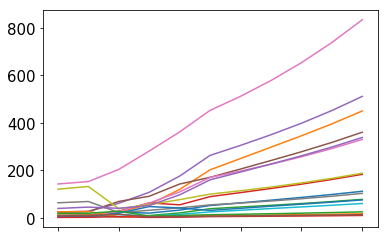

In [63]:
on_exp_reg.transpose().plot(legend=False)

In [64]:
# export to excel
writer = pd.ExcelWriter('demand.xlsx')
on_exp_reg.to_excel(writer,'REA')
off_exp_reg.to_excel(writer,'RER')
overlap_exp_reg.to_excel(writer,'overlap')
writer.save()
writer.close()

### Electricity tier projection

In [65]:
# total demand in PJ
tot_dem_kwh = tot_dem / 3.6e-9

# total demand per connected person per day
tot_dem_daily_kwh_pcp = tot_dem_kwh / (on_pop + off_pop - overlap_pop) / 365.
tot_dem_daily_kwh_pcp = tot_dem_daily_kwh_pcp.drop('2005',axis=1)

# tier - initialize df
tier_prj = tier_2005[['tier']]
tier_prj.columns = ['2005']

# tier - apply get_tier function
for y in tot_dem_daily_kwh_pcp.columns:
    tier_prj.loc[:,y] = tot_dem_daily_kwh_pcp.loc[:,y].apply(get_tier)

# count nr. of countries in each tier and save in new df tier_frq
tier_frq = tier_prj.groupby('2005').count()[['2010']]
tier_frq.index.name = 'tier'
tier_frq.columns = [['2005']]
for y in tier_prj.columns[1:]:
    tier_frq.loc[:,y] = tier_prj.groupby(y).count().iloc[:,1]
tier_frq = tier_frq.fillna(0)
tier_frq

,2005,2010,2020,2030,2040,2050
tier,,,,,,
1,2,3.0,1,0.0,0.0,0.0
2,25,29.0,27,18.0,7.0,4.0
3,18,14.0,16,22.0,29.0,30.0
4,2,2.0,3,7.0,11.0,11.0
5,1,0.0,1,1.0,1.0,3.0


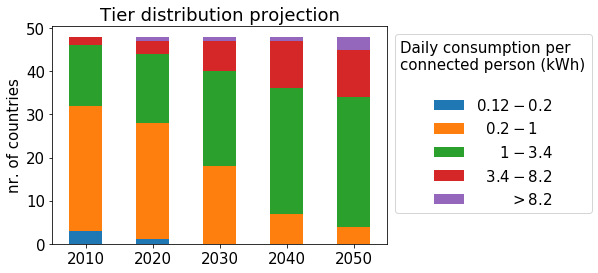

In [66]:
# plot
ax = tier_frq.transpose().plot(kind='bar', stacked=True, rot=0)
ax.set_xticklabels([c[0] for c in tier_frq.columns])
ax.set_ylabel('nr. of countries')
ax.set_title('Tier distribution projection')
ax.set_xlim(0.5,5.5)
lgd = plt.legend(labels = ['$0.12 - 0.2$','  $0.2 - 1$', '     $1 - 3.4$', '  $3.4 - 8.2$', '       $> 8.2$'],\
                 title = 'Daily consumption per\nconnected person (kWh)\n', loc='upper left', bbox_to_anchor=(1, 1))

#lgd.get_title().set_ha('center')
#lgd.get_title().set_position((170,0))


ax.get_figure().savefig('tiers_prj.jpg', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=150)

In [61]:
off_exp.to_excel("off-grid_demand.xlsx")